In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [61]:
data = pd.read_csv('med-insurance.csv')
data.shape

(1338, 7)

In [62]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Descriptive Statistics

C:\Users\Mohammed Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



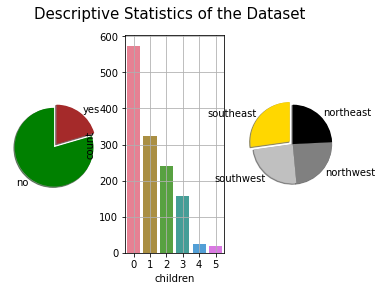

In [63]:
plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['green','brown'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])

plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'husl')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','silver','grey','black'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])
plt.suptitle('Descriptive Statistics of the Dataset', fontsize = 15)
plt.show()

In [64]:
px.scatter(data, y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols')

In [65]:
#Aggregation of Expenses region wise
data[['expenses', 'region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')

In [66]:
#Label Encoding
data['sex'] = data['sex'].replace(('male','female'), (2, 1))
data['smoker'] = data['smoker'].replace(('yes','no'), (2, 1))
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(2, 1, 1, 1))# we are capping all other regions as their expenses were almost same when compared with south-east region

In [67]:
y = data['expenses']
x = data.drop(['expenses'], axis = 1)

print(y.shape)
print(x.columns)

(1338,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [69]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Linear Regression

In [84]:
from sklearn.metrics import r2_score, mean_squared_error
model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

In [85]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred1)
print("R2 Score :",r2_score)

RMSE Score : 5663.441749764154
R2 Score : 0.7984378814790315


In [86]:
scores = cross_val_score(model1, x, y, cv=5)
print(scores)

[0.76207922 0.70626487 0.77640912 0.73075883 0.75729647]


### Random Forest

In [70]:
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

In [71]:
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse)
print("RMSE Score :", rmse2)
r2_score = r2_score(y_test, y_pred2)
print("R2 Score :",r2_score)

RMSE Score : 4067.9194724464405
R2 Score : 0.8789742699514846


In [81]:
scores = cross_val_score(model2, x, y, cv=5)
print(scores)

[0.84869365 0.7770695  0.86328567 0.82248616 0.84033343]


### Gradient Boosting

In [76]:
from sklearn.metrics import r2_score, mean_squared_error
model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

In [77]:
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)
r2_score = r2_score(y_test, y_pred3)
print("R2 Score :",r2_score)

RMSE Score : 4068.1289887739445
R2 Score : 0.8959990113603554


In [82]:
scores = cross_val_score(model3, x, y, cv=5)
print(scores)

[0.88035746 0.79757234 0.8885396  0.8470849  0.85950857]


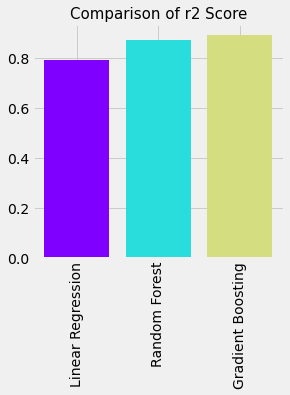

In [78]:
r2_score = np.array([0.79, 0.87, 0.89])
labels = np.array(['Linear Regression', 'Random Forest' 'Gradient Boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 3), ['Linear Regression', 'Random Forest','Gradient Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()